In [10]:
import os
import glob
import cv2
from PIL import Image
import numpy as np

file = 'A1'  # A1 ~ A4

ANN_DIR = f'E:/CVPPP2017_LSC_training/images/{file}'

IMG_DIR = f'E:/CVPPP2017_LSC_training/images/{file}'

SEMANTIC_OUTPUT_DIR = os.path.join(f'E:/CVPPP2017_LSC_training/images/processed/{file}/semantic-annotations')
INSTANCE_OUTPUT_DIR = os.path.join(f'E:/CVPPP2017_LSC_training/images/processed/{file}/instance-annotations')

try:
    os.makedirs(SEMANTIC_OUTPUT_DIR)
except BaseException:
    pass

try:
    os.makedirs(INSTANCE_OUTPUT_DIR)
except BaseException:
    pass

image_paths = glob.glob(os.path.join(IMG_DIR, '*_rgb.png'))

In [11]:
image_path = image_paths[0]
image_name = os.path.splitext(os.path.basename(image_path))[0].split('_')[0]

annotation_path = os.path.join(ANN_DIR, image_name + '_label.png')
print(image_path)
print(annotation_path)

E:/CVPPP2017_LSC_training/images/A1\plant001_rgb.png
E:/CVPPP2017_LSC_training/images/A1\plant001_label.png


In [20]:
img = Image.open(image_path)
img_width, img_height = img.size

annotation = np.array(Image.open(annotation_path))  # (565, 530)

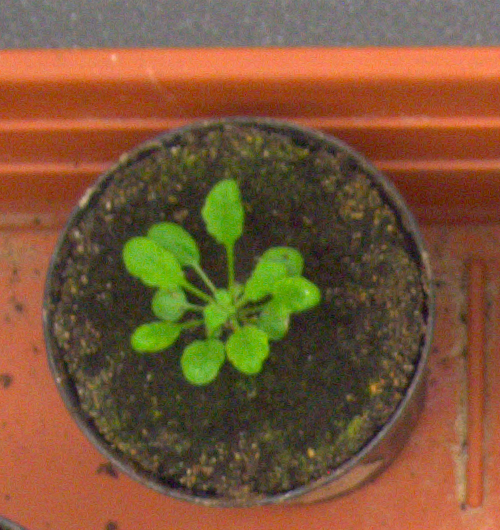

In [22]:
img

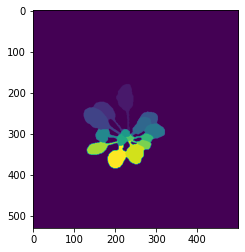

In [21]:
import matplotlib.pyplot as plt

plt.imshow(annotation)
plt.show()

In [17]:
instance_values = set(np.unique(annotation)).difference([0]) # # of different colors(instance labels)
n_instances = len(instance_values)

print(instance_values)
print(n_instances)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
15


In [23]:
instance_mask = np.zeros((img_height, img_width, n_instances), dtype=np.uint8)  # (530, 500, n_instances)

for i, v in enumerate(instance_values):
    _mask = np.zeros((img_height, img_width), dtype=np.uint8)
    _mask[annotation == v] = 1
    instance_mask[:, :, i] = _mask

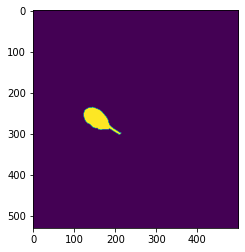

In [28]:
plt.imshow(instance_mask[:, :, 2])